# 参考修改成tf2.0-MOOCTF/class6/p37_tushare.py
p38_rnn_stock.py
p47_LSTM_stock.py
p56_GRU_stock.py

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.preprocessing import MinMaxScaler


print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.3.1
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.16.2
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.3.1
tensorflow.keras 2.4.0


In [2]:
zcfzb = pd.read_csv("./厦门空港(600897)_资产负债表.csv" ,encoding='GBK',index_col=0)
xjllb = pd.read_csv("./厦门空港(600897)_现金流量表.csv" ,encoding='GBK',index_col=0)
lrb = pd.read_csv("./厦门空港(600897)_利润表.csv" ,encoding='GBK',index_col=0)

all_sheet = pd.concat([zcfzb,xjllb,lrb],axis=0)

all_sheet.shape

(201, 91)

In [3]:
all_sheet = all_sheet.dropna()    # 丢弃有缺失值的行
all_sheet = all_sheet.drop(['19700101','19931231','19941231',
                            '19951231','19960630','19961231',
                            '19970630','19971231','19980630',
                            '19981231','19990630','19991231',                            
                            '20000630','20001231','20010630',
                            '20011231','20020331','20020630',
                            '20020930','20021231'], axis=1)

all_sheet

,20200930,20200630,20200331,20191231,20190930,20190630,20190331,20181231,20180930,20180630,...,20050630,20050331,20041231,20040930,20040630,20040331,20031231,20030930,20030630,20030331
报表日期,,,,,,,,,,,,,,,,,,,,,
货币资金,299970697,369086644.93,286416319.99,230476515.06,422667478.21,326472145.05,375491397.65,428436762.59,389952009.14,498013178.75,...,240874027.24,325470034.59,73881623.3,152567240.89,91488301.47,269728953.23,185298845.58,18209716.95,21084704.88,5700932.35
交易性金融资产,990812794.56,883941874.17,958048442.14,953595833.36,0,0,0,0,0,0,...,19768550.5,39449101,248193501,129303003.43,99601150,0,0,40000000,40000000,42000000
衍生金融资产,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
应收票据及应收账款,284275567.36,199025638.41,150694881.85,238743155.73,273533414.48,294539714.33,282891046.64,251096468.34,292833706.59,326544457.32,...,0,0,0,0,0,0,0,0,0,0
应收票据,2500000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
稀释每股收益(元/股),0.3253,0.0478,0.0102,1.7405,1.3354,0.8736,0.3983,1.6979,1.2751,0.8431,...,0,0,0,0,0,0,0,0,0,0
七、其他综合收益,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
八、综合收益总额,109143952.11,20518228.47,3731489.02,537148103.24,412690011.22,270584693.37,123321201.34,526793448.81,396234372.84,262259325.21,...,0,0,0,0,0,0,0,0,0,0


In [4]:
all_sheet = all_sheet.T
all_sheet

报表日期,货币资金,交易性金融资产,衍生金融资产,应收票据及应收账款,应收票据,应收账款,应收款项融资,预付款项,其他应收款(合计),应收利息,...,减：所得税费用,五、净利润,归属于母公司所有者的净利润,少数股东损益,基本每股收益(元/股),稀释每股收益(元/股),七、其他综合收益,八、综合收益总额,归属于母公司所有者的综合收益总额,归属于少数股东的综合收益总额
20200930,299970697,990812794.56,0,284275567.36,2500000,281775567.36,0,1754046.89,20327160.84,0,...,37389436.98,109143952.11,96870305.23,12273646.88,0.3253,0.3253,0,109143952.11,96870305.23,12273646.88
20200630,369086644.93,883941874.17,0,199025638.41,0,199025638.41,0,1078512.03,15973572.46,0,...,7056697.8,20518228.47,14221299.23,6296929.24,0.0478,0.0478,0,20518228.47,14221299.23,6296929.24
20200331,286416319.99,958048442.14,0,150694881.85,0,150694881.85,0,515972.67,14212844.26,0,...,3216227.01,3731489.02,3039369.72,692119.3,0.0102,0.0102,0,3731489.02,3039369.72,692119.3
20191231,230476515.06,953595833.36,0,238743155.73,0,238743155.73,0,1267339.43,7493799.99,0,...,178666903.57,537148103.24,518327930.54,18820172.7,1.7405,1.7405,0,537148103.24,518327930.54,18820172.7
20190930,422667478.21,0,0,273533414.48,0,273533414.48,0,1203413.37,11823644.24,0,...,136302878.43,412690011.22,397682005.52,15008005.7,1.3354,1.3354,0,412690011.22,397682005.52,15008005.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20040331,269728953.23,0,0,0,0,27328478.45,0,166929115.74,0,0,...,3030595.55,14969464.23,14969464.23,0,0,0,0,0,0,0
20031231,185298845.58,0,0,0,0,30650312.1,0,8958552.35,0,0,...,8660811.76,39881388.31,39881388.31,0,0,0,0,0,0,0
20030930,18209716.95,40000000,0,0,0,37977955.31,0,10574739.23,0,3703725,...,5184757.7,26646264.29,26646264.29,0,0,0,0,0,0,0
20030630,21084704.88,40000000,0,0,0,35074244.32,0,11461384.72,0,3624075,...,2903313.19,13658996.94,13658996.94,0,0,0,0,0,0,0


In [9]:
all_sheet = all_sheet.iloc[::-1]#颠倒行
all_sheet
# all_sheet.to_csv("./all_demo.csv")

71

In [34]:
all_sheet = pd.read_csv("./all_demo.csv" ,index_col=0)
print(len(all_sheet))
training_set = all_sheet.iloc[0:len(all_sheet)-11].values
test_set = all_sheet.iloc[len(all_sheet)-11:].values


#归一化
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.fit_transform(test_set)


x_train = []
y_train = []

x_test = []
y_test = []

# 测试集：csv表格中前71-11=60季度的数据
# 利用for循环，遍历整个训练集，提取训练集中连续3季度的数据作为输入特征x_train，
#第4季度的数据作为标签，for循环共构建2426-300-60=2066组数据。
for i in range(3, len(training_set_scaled)):
    x_train.append(training_set_scaled[i - 3:i])
    y_train.append(training_set_scaled[i])

# # 对训练集进行打乱
# np.random.seed(7)
# np.random.shuffle(x_train)
# np.random.seed(7)
# np.random.shuffle(y_train)
# tf.random.set_seed(7)
# 将训练集由list格式变为array格式
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape,y_train.shape


71


((57, 3, 117), (57, 117))

In [35]:
for i in range(3, len(test_set)):
    x_test.append(test_set[i - 3:i])
    y_test.append(test_set[i])
# 测试集变array并reshape为符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]
x_test, y_test = np.array(x_test), np.array(y_test)
# x_test = np.reshape(x_test, (x_test.shape[0], 60, 1))
x_test.shape,y_test.shape


((8, 3, 117), (8, 117))

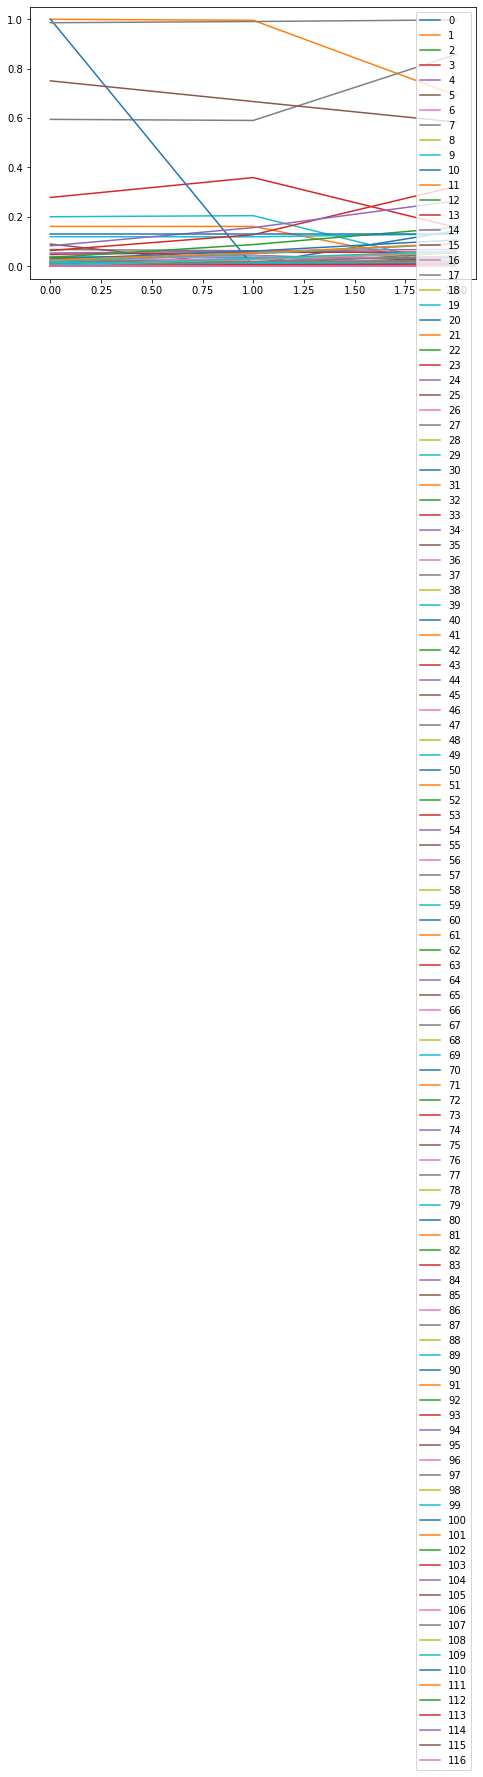

In [36]:
pd.DataFrame(x_train[1]).astype(float).plot(figsize=(8, 5))
plt.show()

In [5]:
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [6]:
# y_train = all_sheet.iloc[3:4,:].values
# # y_train = y_train.squeeze()
# y_train.shape


In [8]:
# 使x_train符合RNN输入要求：[送入样本数， 循环核时间展开步数， 每个时间步输入特征个数]。
# 此处整个数据集送入，送入样本数为x_train.shape[0]即2066组数据；
# 输入60个开盘价，预测出第61天的开盘价，循环核时间展开步数为60; 
# 每个时间步送入的特征是某一天的开盘价，只有1个数据，故每个时间步输入特征个数为1
# x_train_scaled = np.array(x_train)
# x_train_scaled = np.reshape(x_train_scaled, (x_train_scaled.shape[0], 1, 351))
# x_train_scaled.shape

(17, 1, 351)

In [41]:
batch_size = 512

model = keras.models.Sequential()
    
# model.add(keras.Input(shape=[1,351]))
model.add(keras.layers.LSTM(units=128, activation='tanh', return_sequences=True, 
                           input_shape = [3, 117]))
# model.add(Dropout(0.2))
model.add(keras.layers.LSTM(units=117, activation='tanh', return_sequences=True))
# model.add(Dropout(0.2))


model.add(keras.layers.Dense(units=117, activation="relu"))
# 全连接，输出117个
model.add(keras.layers.Dense(units=117, activation='softmax'))
# MAE,平均绝对误差(Mean Absolute Error)
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="mean_squared_error",
              metrics=[keras.metrics.mae])

#LSTM的输入为 [samples, timesteps, features],
#这里的timesteps为步数，features为维度 这里我们的数据是6维的   
# model.add(keras.Input(shape=[17, 351]))

# model.add(Dense(128, activation = 'relu'))

# model.add(Dense(117, activation='softmax'))
                                             
# model.compile(optimizer="adam", loss="mean_squared_error",
#               metrics=[keras.metrics.mae])                     


model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 3, 128)            125952    
_________________________________________________________________
lstm_5 (LSTM)                (None, 3, 117)            115128    
_________________________________________________________________
dense_2 (Dense)              (None, 3, 117)            13806     
_________________________________________________________________
dense_3 (Dense)              (None, 3, 117)            13806     
Total params: 268,692
Trainable params: 268,692
Non-trainable params: 0
_________________________________________________________________


In [42]:

history = model.fit(x_train, y_train, batch_size=2, epochs=1000)
# model.fit(x_train, y_train,epochs=10)


Epoch 1/1000


InvalidArgumentError:  Incompatible shapes: [2,3,117] vs. [2,117]
	 [[node sub (defined at <ipython-input-42-b896f916ca1e>:1) ]] [Op:__inference_train_function_16450]

Function call stack:
train_function
